### ㅇ 문항
- ~문항 아이디 : 자동~
- 문항 정답 : 문제 출력 시 정답지도 함께 출력줘야 하므로 => 1, 2, 3, 4, 5 랜덤 입력
- 원본 이미지 경로 : 이미지 이름은 1~1865에 맞춰서 & 각각 3문제씩 (1), (2), (3)
- 단위개념 아이디 : knowledgeTag_skillID에 매핑되어 있는 단위개념 찾아서 적기

In [1]:
import json
# knowledgeTag_skillID 가져오기
json_path = './data/knowledgeTag_skillID.json'
with open(json_path, 'r', encoding='utf-8') as j :
    skill_dic = json.load(j)

In [2]:
import random

file_path = "./data/insert_items.sql"

rand_num = random.randint(1, 5)

with open(file_path, "w") as file:
    for i in range(1, 1866) :
        concept_id = skill_dic[str(i)]
        for j in range(1, 4) :
            rand_num = random.randint(1, 5)
            image_path = f"/images/items/{i}({j})"
            ######################################## sql문도 수정해야 함 ############################
            sql = f"INSERT INTO items values ('{rand_num}', '{image_path}', {concept_id});"
            file.write(sql + "\n")

# ㅇ 부족한 234개는 우선 빼고 insert 문 만들자
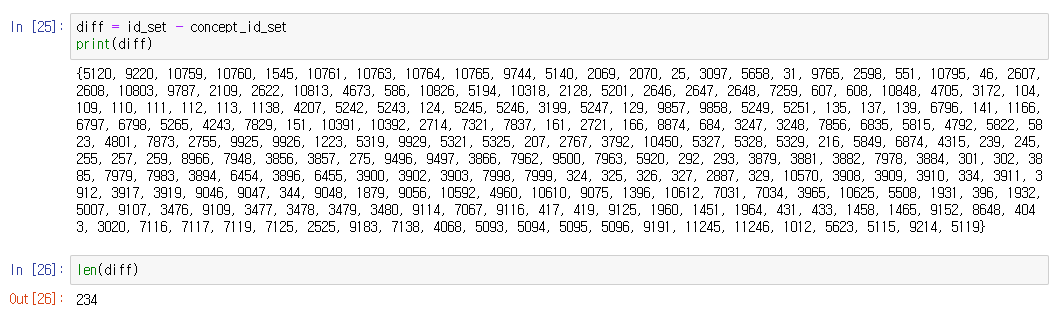

In [3]:
import json
import random

# knowledgeTag_skillID 가져오기
json_path = './data/knowledgeTag_skillID.json'
with open(json_path, 'r', encoding='utf-8') as j :
    skill_dic = json.load(j)

# concepts_id 가져오기
concept_id_arr = []
json_path = './data/concepts_sorted.json'
with open(json_path, 'r', encoding='utf-8') as j :
    concepts = json.load(j)
for concept in concepts :
    concept_id_arr.append(concept['id'])
    
# concept_id_arr에 없는 애들은 continue
file_path = "./data/insert_items_missing.sql"

with open(file_path, "w") as file:
    for i in range(1, 1866) :
        concept_id = skill_dic[str(i)]
        if concept_id in concept_id_arr :
            for j in range(1, 4) :
                rand_num = random.randint(1, 5)
                image_path = f"/images/items/{i}({j})"
                sql = f"INSERT INTO items(item_answer, item_image_path, concept_id) values ('{rand_num}', '{image_path}', {concept_id});"
                file.write(sql + "\n")